# IMPORTING THE LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.regressor import StackingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, mean_squared_error, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("HeartAttack (1).csv", na_values="?")  # Importing the csv file

# ANALYSIS AND CLEANING OF THE DATASET

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1
293,65,1,4,130.0,275.0,0.0,1.0,115.0,1.0,1.0,2.0,NaN,NaN,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    float64
 4   chol        271 non-null    float64
 5   fbs         286 non-null    float64
 6   restecg     293 non-null    float64
 7   thalach     293 non-null    float64
 8   exang       293 non-null    float64
 9   oldpeak     294 non-null    float64
 10  slope       104 non-null    float64
 11  ca          3 non-null      float64
 12  thal        28 non-null     float64
 13  num         294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [11]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [12]:
df["age"].unique()
df["age"].mean()

47.826530612244895

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,3.0,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,0.0,5.642857,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,0.0,1.615074,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


In [14]:
df.drop(["thal", "ca", "slope"], axis=1, inplace=True)

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0


In [16]:
df = df.dropna()

In [17]:
df.head()
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64

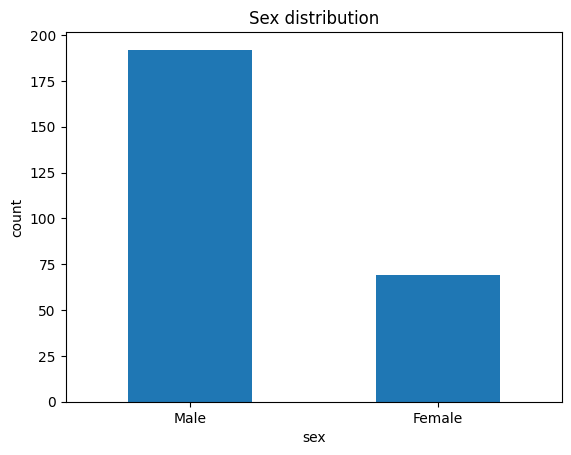

In [18]:
ax = df["sex"].value_counts().plot(kind='bar')
plt.xlabel('sex')
plt.ylabel('count')
plt.title("Sex distribution")
ax.set_xticklabels(['Male', 'Female'], rotation=0)
plt.show()

In [19]:
df["cp"].value_counts()

cp
4    113
2     92
3     46
1     10
Name: count, dtype: int64

In [20]:
df["restecg"].value_counts()

restecg
0.0    208
1.0     47
2.0      6
Name: count, dtype: int64

In [21]:
df["fbs"].value_counts()

fbs
0.0    242
1.0     19
Name: count, dtype: int64

In [22]:
df = pd.get_dummies(df, columns=["cp", "restecg"])

In [23]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0.0,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,False,True,False,False,False,False,True
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,False,True,False,False,True,False,False
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,True,False,False,False,False,True,False
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,False,True,False,False,False,True,False
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,False,True,False,False,True,False,False


In [24]:
df = df.rename(columns={"num       ":"result", "cp_1":"cp1", "cp_2":"cp2","cp_3":"cp3","cp_4":"cp4", "restecg_0.0":"restecg0", "restecg_1.0":"restecg1","restecg_2.0":"restecg2"})

# STANDARDIZATION OF THE COLUMNS FOR BETTER PERFORMANCE

In [25]:
scaler = StandardScaler()

numerical_cols = ["age", "trestbps", "chol", "thalach","oldpeak"]
category_cols = list(set(df.columns) - set(numerical_cols) - {"result"})
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])   #Noramlization of dataset
print(category_cols) 

['cp2', 'cp4', 'sex', 'restecg2', 'fbs', 'cp1', 'restecg0', 'restecg1', 'cp3', 'exang']


In [26]:
print(numerical_cols)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [27]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,result,cp1,cp2,cp3,cp4,restecg0,restecg1,restecg2
0,-2.525820,1,-0.149347,-1.782424,0.0,1.930425,0.0,-0.658254,0,False,True,False,False,False,False,True
1,-2.398061,1,-0.715089,-0.088855,0.0,0.876100,0.0,-0.658254,0,False,True,False,False,True,False,False
3,-2.270301,0,2.113621,-0.180399,0.0,1.297830,0.0,-0.658254,0,True,False,False,False,False,True,False
4,-2.142542,0,-1.846574,-0.455032,0.0,0.454370,0.0,-0.658254,0,False,True,False,False,False,True,False
5,-2.014782,0,-1.563703,-0.775437,0.0,1.086965,0.0,-0.658254,0,False,True,False,False,True,False,False


In [28]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [29]:
len(df_train), len(df_test)

(208, 53)

In [61]:
def get_features_and_target_arrays(df, numerical_cols, category_cols, scaler):
    # x_numeric_scales = scaler.fit_transform(df[numerical_cols])  
    x_numeric_scales = df[numerical_cols]
    x_categorical = df[category_cols].to_numpy()
    x = np.hstack((x_categorical, x_numeric_scales)) #concatenate type ka add kr dega dono ko
    y = df["result"]
    return x, y

In [63]:
df.head(3)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,result,cp1,cp2,cp3,cp4,restecg0,restecg1,restecg2
0,-2.525820,1,-0.149347,-1.782424,0.0,1.930425,0.0,-0.658254,0,False,True,False,False,False,False,True
1,-2.398061,1,-0.715089,-0.088855,0.0,0.876100,0.0,-0.658254,0,False,True,False,False,True,False,False
3,-2.270301,0,2.113621,-0.180399,0.0,1.297830,0.0,-0.658254,0,True,False,False,False,False,True,False


In [32]:
y = df["result"]
X = df.drop(["result"], axis=1)

# Machine Learning Models To Find The Accuracy Of The Model

In [73]:
x_train, y_train = get_features_and_target_arrays(df_train, numerical_cols, category_cols, scaler)
x_test, y_test = get_features_and_target_arrays(df_test, category_cols, numerical_cols, scaler)
df.head(1)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,result,cp1,cp2,cp3,cp4,restecg0,restecg1,restecg2
0,-2.52582,1,-0.149347,-1.782424,0.0,1.930425,0.0,-0.658254,0,False,True,False,False,False,False,True


# LOGISTIC REGRESSION

In [87]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)  # Fitting in the train data

log_test_pred = log_clf.predict(x_test)  # Predicting for test dataset
# mean_squared_error(y_test, test_pred)  # Calculating Mean_squared_error
log_acc = accuracy_score(y_test, log_test_pred)  # Calculating the accuracy of the model by comparing it with the actual values
print("Accuracy of the model is : ", log_acc) # Printing the accuracy

log_score = cross_val_score(log_clf, X, y, cv=20)  # Cross_val_score Logistic Classification
log_cross_accuracy = log_score.mean()
print("Cross Val Accuracy of the model is : ", log_cross_accuracy)

Accuracy of the model is :  0.7547169811320755
Cross Val Accuracy of the model is :  0.8277472527472529


Text(0, 0.5, 'Accuracy Scores')

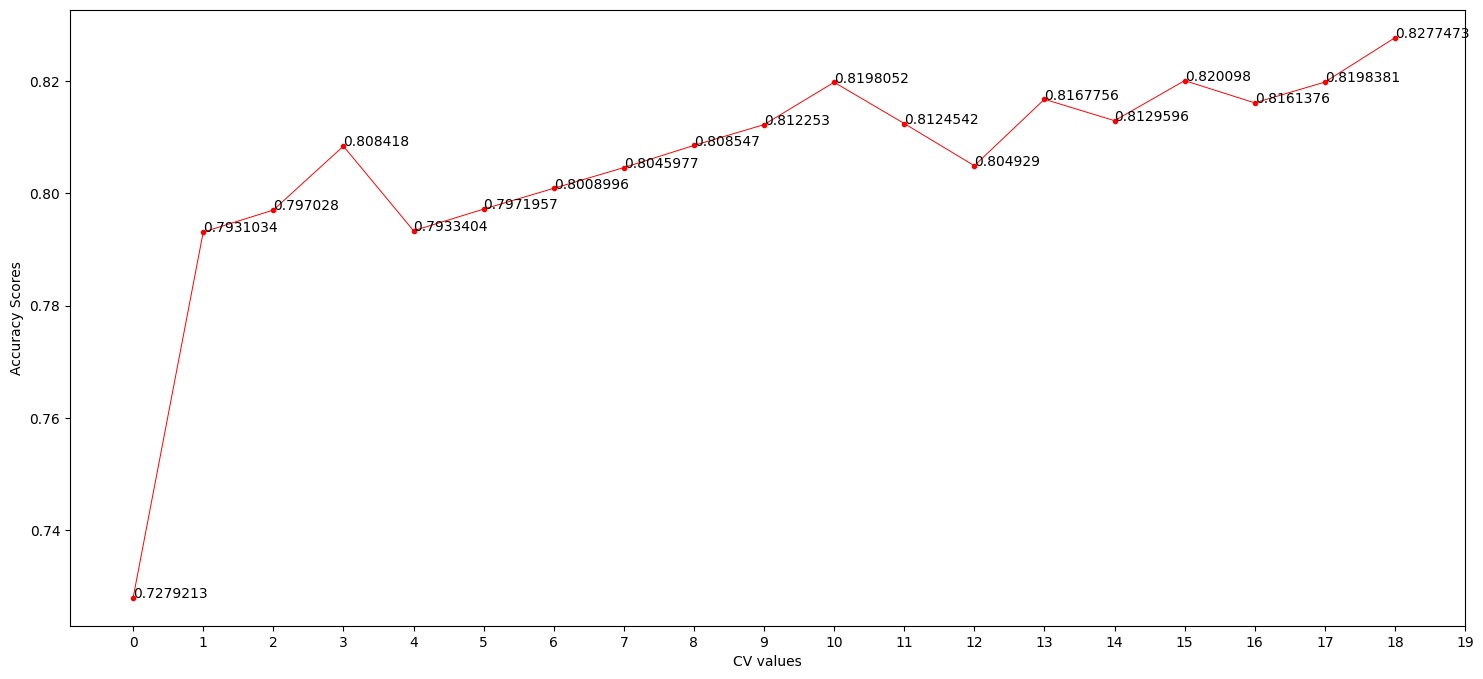

In [94]:
log_arr = []
for i in range(2, 21):
    log_range_score = cross_val_score(log_clf, X, y, cv=i)
    log_arr.append(log_range_score.mean())
plt.figure(figsize=(18,8))
plt.plot(log_arr, marker='.', color='red', linewidth=.7)
for i, score in enumerate(log_arr):
    plt.text(i, score, str(round(score, 7)))
plt.xticks([i-1 for i in range(1, 21)])
plt.xlabel("CV values")
plt.ylabel("Accuracy Scores")


In [65]:
confusion_matrix(y_test, log_test_pred)

array([[29,  4],
       [ 9, 11]], dtype=int64)

# DECISIONTREE CLASSIFICATION

In [55]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

dt_test_pred = dt_clf.predict(x_test)  # Normal DecisionTree Classification
# print(mean_squared_error(y_test, dt_test_pred))
dt_acc = accuracy_score(y_test, dt_test_pred)
print("Accuracy of the model is : ", dt_acc)

dt_score = cross_val_score(dt_clf, X, y, cv=10)  # Cross_val_score DecisionTree Classification
dt_cross_accuracy = dt_score.mean()  # Calculating the mean of the cross_val_score
print("Cross Val Accuracy of the model is : ", dt_cross_accuracy)


Accuracy of the model is :  0.7735849056603774
Cross Val Accuracy of the model is :  0.7200854700854702


# RANDOMFOREST CLASSIFICATION

In [100]:
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf.fit(x_train, y_train)

rf_test_pred = rf_clf.predict(x_test)  # Normal RandomForest Classification 
rf_acc = accuracy_score(y_test, rf_test_pred)
print("Accuracy of the model is : ", rf_acc)

rf_score = cross_val_score(rf_clf, X, y, cv=16)  # Cross_val_score RandomForest Classification
rf_cross_accuracy = rf_score.mean()
print("Cross Val Accuracy of the model is : ", rf_cross_accuracy)

# print(mean_squared_error(y_test, rf_test_pred))

Accuracy of the model is :  0.6037735849056604
Cross Val Accuracy of the model is :  0.7738970588235294


Text(0, 0.5, 'Accuracy Scores')

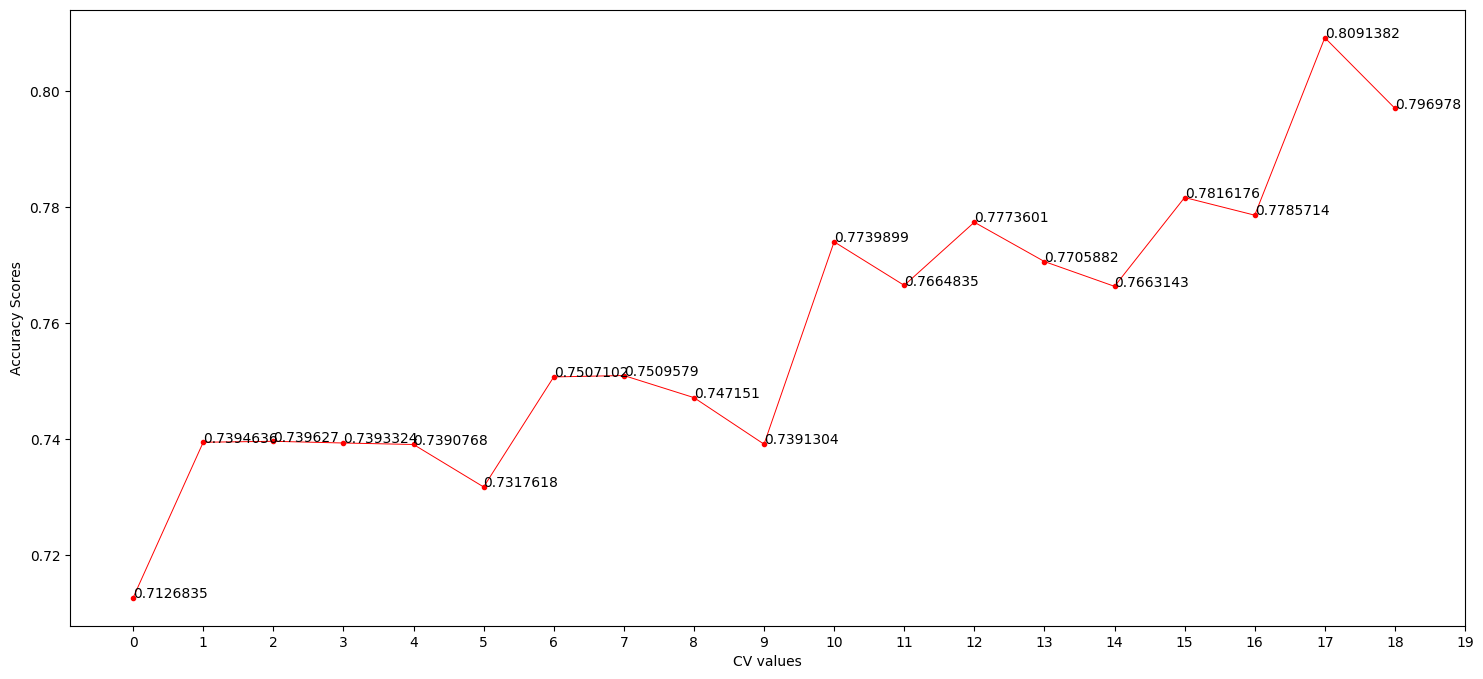

In [104]:
rf_arr = []
for i in range(2, 21):
    rf_range_score = cross_val_score(rf_clf, X, y, cv=i)
    rf_arr.append(rf_range_score.mean())
plt.figure(figsize=(18,8))
plt.plot(rf_arr, marker='.', color='red', linewidth=.7)
# plt.bar(np.arange(2, 21), rf_arr, color='gray')
for i, score in enumerate(rf_arr):
    plt.text(i, score, str(round(score, 7)))
plt.xticks([i-1 for i in range(1, 21)])
plt.xlabel("CV values")
plt.ylabel("Accuracy Scores")

# SVM CLASSIFICATION

In [60]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)

svm_test_pred = svm_clf.predict(x_test)  # Normal SVM
# print(mean_squared_error(y_test, svm_test_pred))
svm_accuracy = accuracy_score(y_test, svm_test_pred)
print("Accuracy of the model is : ", svm_accuracy)


svm_score = cross_val_score(svm_clf, X, y, cv=10)  # Cross_val_score SVM
svm_cross_accuracy = svm_score.mean()
print("Cross Val Accuracy of the model is : ", svm_cross_accuracy)

Accuracy of the model is :  0.7547169811320755
Cross Val Accuracy of the model is :  0.8009971509971511


# KNN CROSS_VAL_SCORE FROM K = 1 TO K = 21

In [89]:
knn_scores = []
a = 0
for i in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_scores.append(score.mean())
    a = a + score.mean()
print("Mean of all cross_val_scores is : ", a/20)

Mean of all cross_val_scores is :  0.7949358974358973


# VISIUALISING THE BEST VALUE OF K 

Text(0.5, 1.0, 'Classification depending on the value of K')

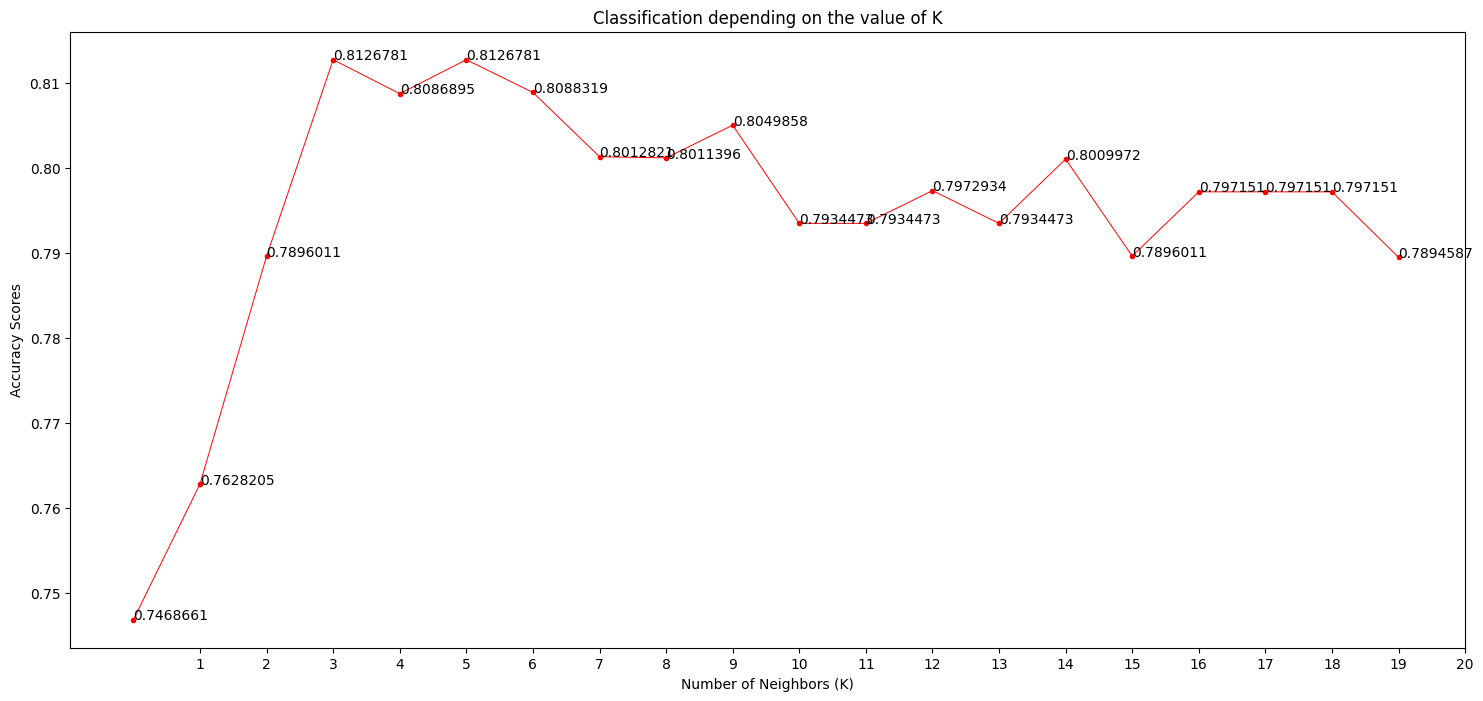

In [40]:
plt.figure(figsize=(18,8))
plt.plot(knn_scores, marker='.', color='red', linewidth=.7)
for i, score in enumerate(knn_scores):
    # plt.text(i, score, str(round(score, 7)), ha='center', va='bottom')
    plt.text(i, score, str(round(score, 7)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy Scores")
plt.title("Classification depending on the value of K")


In [46]:
knn_clf = KNeighborsClassifier(n_neighbors=5) # K=5 gives the best accuracy
knn_clf.fit(x_train, y_train)


knn_test_pred = knn_clf.predict(x_test)  # Normal KNN 
knn_accuracy = accuracy_score(y_test, knn_test_pred)
print("Accuracy of the model is : ", knn_accuracy)

knn_score = cross_val_score(knn_clf, X, y, cv=10) # Cross_val_score KNN
# print(knn_score)
knn_cross_accuracy = knn_score.mean()
print("Cross Val Accuracy of the model is : ", knn_cross_accuracy)

Accuracy of the model is :  0.7547169811320755
Cross Val Accuracy of the model is :  0.8086894586894587


# CHECKING IF STACKING GIVES MORE ACCURACY

In [42]:
stacked = StackingRegressor(regressors=[log_clf, rf_clf, dt_clf, knn_clf], meta_regressor=log_clf)

In [44]:
stacked.fit(x_train, y_train)
stacked_pred = stacked.predict(x_test)
stacked_accuracy = accuracy_score(y_test, stacked_pred)
print(stacked_accuracy)

0.7735849056603774
